In [1]:
import numpy as np
import pandas as pd
import os
from os import path
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import RadiusNeighborsRegressor, KNeighborsRegressor
from sklearn.decomposition import PCA
import sys
root = "/project/wyin/jlee/ml-project/"
util_loc = os.path.join(root, "utils")
data_loc = os.path.join(root, "inverse-shifted/data")
sys.path.append(util_loc)
from inverse_utilities import InverseNeuralNet, InverseDataModule, ScaledData, see_results

In [2]:
data = ScaledData(data_loc)
print(data.train_dos)

[[ 0.         -0.01083983 -0.02342144 ... -0.02724585 -0.012509
   0.        ]
 [ 0.         -0.01083983 -0.02342144 ... -0.02724585 -0.012509
   0.        ]
 [ 0.         -0.01083983 -0.02342144 ... -0.02724585 -0.012509
   0.        ]
 ...
 [ 0.         -0.01083983 -0.02342144 ... -0.02724585 -0.012509
   0.        ]
 [ 0.         -0.01083983 -0.02342144 ... -0.02724585 -0.012509
   0.        ]
 [ 0.         -0.01083983 -0.02342144 ... -0.02724585 -0.012509
   0.        ]]


In [2]:
knn_mse_uniform = []
for i in range(1, 10):
    print(f"trying n neights = {i}")
    neigh = KNeighborsRegressor(n_neighbors = i)
    neigh.fit(data.train_dos, data.train_params)
    predicted = neigh.predict(data.val_dos)
    print(predicted.shape)
    
    mse = np.mean((data.val_params - predicted)**2)
    knn_mse_uniform.append(mse)
    
knn_mse_uniform = np.array(knn_mse_uniform)
plt.plot(knn_mse_uniform)
print(np.min(knn_mse_uniform))
print(np.argmin(knn_mse_uniform) + 1)

trying n neights = 1


NameError: name 'data' is not defined

In [5]:
#No standard scaling
train_set = np.load(path.join(data_loc, "train-set.npz"))
train_dos = train_set['dos']
train_params = train_set['params']

val_set = np.load(path.join(data_loc, "val-set.npz"))
val_dos = val_set['dos']
val_params = val_set['params']

test_set = np.load(path.join(data_loc, "test-set.npz"))
test_dos = test_set['dos']
test_params = test_set['params']

print(test_dos.shape)

(3238, 354)


trying n neights = 1
(3103, 3)
trying n neights = 2
(3103, 3)
trying n neights = 3
(3103, 3)
trying n neights = 4
(3103, 3)
trying n neights = 5
(3103, 3)
trying n neights = 6
(3103, 3)
trying n neights = 7
(3103, 3)
trying n neights = 8
(3103, 3)
trying n neights = 9
(3103, 3)
6.643613707165108e-05
4


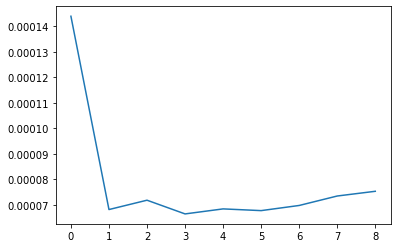

In [6]:
knn_mse_uniform = []
for i in range(1, 10):
    print(f"trying n neights = {i}")
    neigh = KNeighborsRegressor(n_neighbors = i)
    neigh.fit(train_dos, train_params)
    predicted = neigh.predict(val_dos)
    print(predicted.shape)
    
    mse = np.mean((val_params - predicted)**2)
    knn_mse_uniform.append(mse)
    
knn_mse_uniform = np.array(knn_mse_uniform)
plt.plot(knn_mse_uniform)
print(np.min(knn_mse_uniform))
print(np.argmin(knn_mse_uniform) + 1)

trying n neights = 1
(3103, 3)
trying n neights = 2
(3103, 3)
trying n neights = 3
(3103, 3)
trying n neights = 4
(3103, 3)
trying n neights = 5
(3103, 3)
trying n neights = 6
(3103, 3)
trying n neights = 7
(3103, 3)
trying n neights = 8
(3103, 3)
trying n neights = 9
(3103, 3)
trying n neights = 10
(3103, 3)
trying n neights = 11
(3103, 3)
trying n neights = 12
(3103, 3)
trying n neights = 13
(3103, 3)
trying n neights = 14
(3103, 3)
trying n neights = 15
(3103, 3)
trying n neights = 16
(3103, 3)
trying n neights = 17
(3103, 3)
trying n neights = 18
(3103, 3)
trying n neights = 19
(3103, 3)
trying n neights = 20
(3103, 3)
trying n neights = 21
(3103, 3)
trying n neights = 22
(3103, 3)
trying n neights = 23
(3103, 3)
trying n neights = 24
(3103, 3)
trying n neights = 25
(3103, 3)
trying n neights = 26
(3103, 3)
trying n neights = 27
(3103, 3)
trying n neights = 28
(3103, 3)
trying n neights = 29
(3103, 3)
trying n neights = 30
(3103, 3)
trying n neights = 31
(3103, 3)
trying n neights 

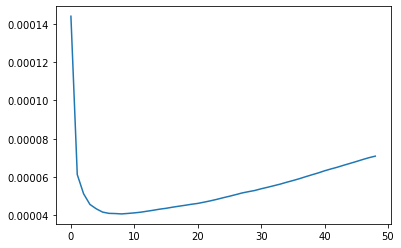

In [7]:
def get_weights(distances):
    return distances ** -3

knn_mse_weighted = []
for i in range(1, 50):
    print(f"trying n neights = {i}")
    neigh = KNeighborsRegressor(n_neighbors = i, weights = get_weights)
    neigh.fit(train_dos, train_params)
    predicted = neigh.predict(val_dos)
    print(predicted.shape)
    
    mse = np.mean((val_params - predicted)**2)
    knn_mse_weighted.append(mse)
    
knn_mse_weighted = np.array(knn_mse_weighted)
plt.plot(knn_mse_weighted)
print(np.min(knn_mse_weighted))
print(np.argmin(knn_mse_weighted) + 1)

In [9]:
#Results visualization on test set
best_model = KNeighborsRegressor(n_neighbors = 9, weights = get_weights)
best_model.fit(train_dos, train_params)
predicted = best_model.predict(test_dos)

mse_mat = (predicted - test_params) ** 2
mse_list = np.mean(mse_mat, axis = 1)
print(f"model mse: {np.mean(mse_list)}")

mse_params = zip(mse_list, predicted, test_params)
mse_params = sorted(mse_params, key = lambda x: x[0], reverse = True)

model mse: 4.194476108913502e-05


In [12]:
print("Nearest neighbor results: ")
for i in range(10):
    print(f"Percentile {i}:")
    index = i * (len(mse_params) // 100)
    t1_truth, t2_truth, j_truth = mse_params[index][2]
    print(f"Ground truth: t1: {t1_truth}, t2: {t2_truth}, J: {j_truth}")
    
    t1_pred, t2_pred, j_pred = mse_params[index][1]
    print(f"Predicted: t1: {t1_pred:.4f}, t2: {t2_pred:.4f}, J: {j_pred:.4f}")
    
    print()

Nearest neighbor results: 
Percentile 0:
Ground truth: t1: -0.02, t2: 0.14, J: 0.232
Predicted: t1: -0.0718, t2: 0.1300, J: 0.2345

Percentile 1:
Ground truth: t1: -0.02, t2: 0.1, J: 0.552
Predicted: t1: -0.0495, t2: 0.0930, J: 0.5647

Percentile 2:
Ground truth: t1: -0.26, t2: 0.14, J: 0.664
Predicted: t1: -0.2346, t2: 0.1400, J: 0.6565

Percentile 3:
Ground truth: t1: -0.02, t2: 0.44, J: 0.52
Predicted: t1: -0.0448, t2: 0.4400, J: 0.5201

Percentile 4:
Ground truth: t1: -0.02, t2: 0.46, J: 0.536
Predicted: t1: -0.0437, t2: 0.4600, J: 0.5366

Percentile 5:
Ground truth: t1: -0.46, t2: 0.04, J: 0.264
Predicted: t1: -0.4377, t2: 0.0354, J: 0.2622

Percentile 6:
Ground truth: t1: -0.04, t2: 0.1, J: 0.552
Predicted: t1: -0.0603, t2: 0.0967, J: 0.5590

Percentile 7:
Ground truth: t1: -0.46, t2: 0.22, J: 0.296
Predicted: t1: -0.4401, t2: 0.2155, J: 0.2937

Percentile 8:
Ground truth: t1: -0.18, t2: 0.36, J: 0.424
Predicted: t1: -0.1605, t2: 0.3600, J: 0.4229

Percentile 9:
Ground truth: t1:

KNN Results
model mse: 4.194476108913502e-05


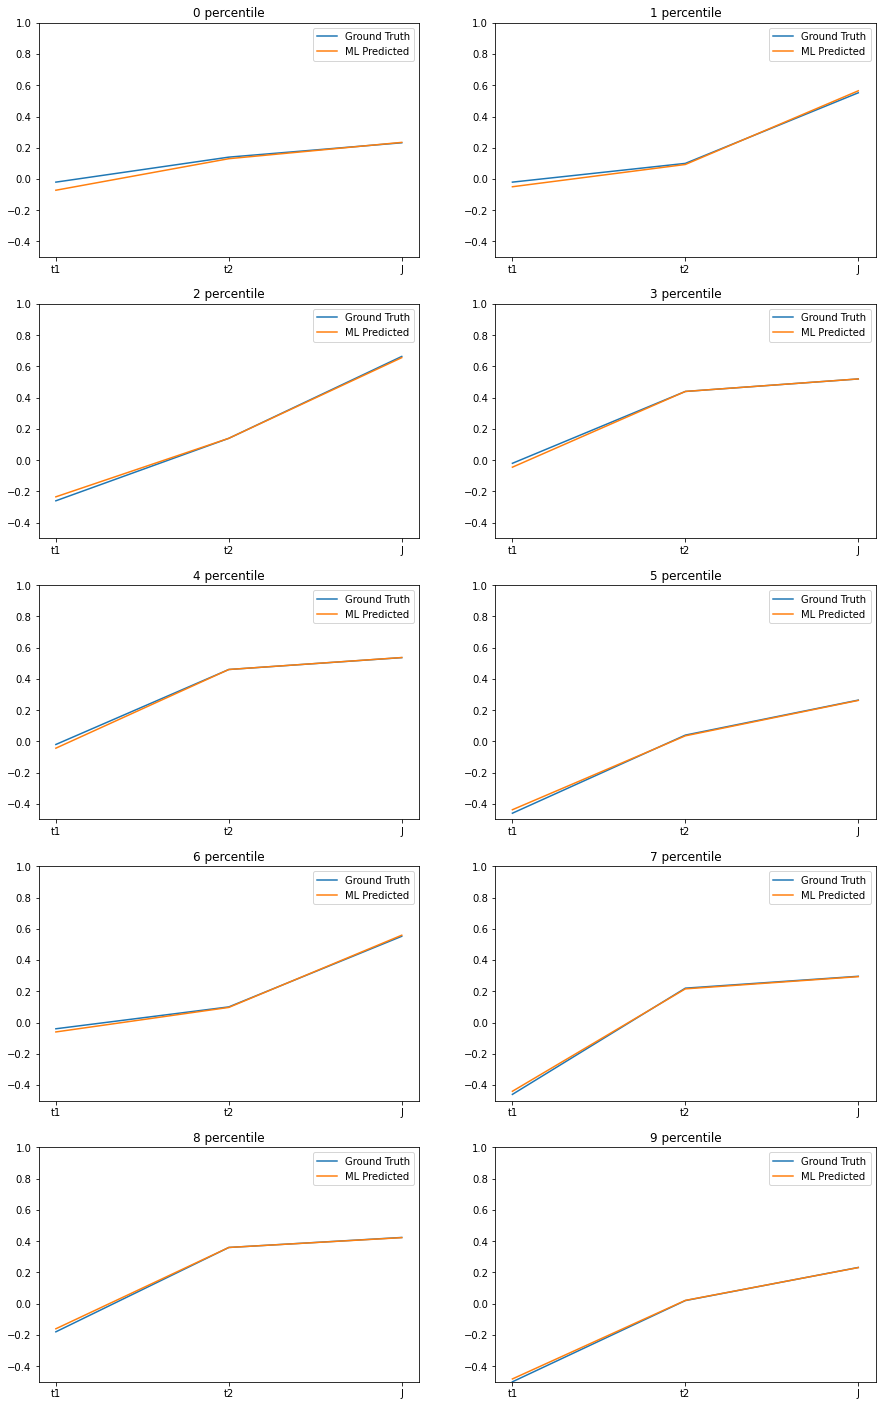

In [14]:
print("KNN Results")
see_results(predicted, test_params, (5, 2), np.arange(0, 10, 1))